# Exercicis d'Hipotesis Testing.
# Ejercicios de Hipotesis Testing.
# Hypothesis Testing exercises.

- Exercici 1

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

- Ejercicio 1

Descarga el dataset adjunto de datos oficiales de la UEFA y selecciona un atributo del conjunto de datos. Calcula el p-valor y di si rechaza la hipótesis nula cogiendo un alfa de 5%.

- Exercise 1

Download the attached dataset of official UEFA data and select an attribute from the dataset. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('/content/gdrive/MyDrive/Lligues europees UEFA.csv', sep=';',encoding='latin-1')

In [ ]:
df.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


In [ ]:
df.columns

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

1. Rk - Rànquing
2. Squad - Nom de l'equip
3. Country - Nom del país
4. LgRk - Posició de l'equip en la competició
5. MP - Partits jugats
6. W - Victòries
7. D - Empats
8. L - Derrotes
9. GF - Gols a favor
10. GA - Gols en contra
11. GD - Diferència de gols
12. Pts - Punts (3 per victòria i 1 per empat)
13. Pts/G - Punts per partit
14. xG - Gols esperats, incloent penals (excepte tirs de penals fins que s'indiqui)
15. xGA - Gols esperats rebuts (excepte tirs de penals fins que s'indiqui)
16. xGD - Diferència de gols esperada (excepte tirs de penals fins que s'indiqui)
17. xGD/90 - Diferència de gols esperada per cada 90 minuts (excepte tirs de penals fins que s'indiqui)
18. Last 5 - Últims 5 partits ordenats cronològicament d'esquerra a dreta
19. Attendance - Assistència per partit durant la temporada, només per a partits a casa
20. Top Team Scorer - Màxim golejador de l'equip en els partits de lliga durant aquesta temporada
21. Goalkeeper - Porter amb més minuts jugats a la lliga
--------------------------------------------------
1. Rk - Rango
2. Squad - Nombre del equipo
3. Country - Nombre del país
4. LgRk - Posición del equipo en la competición
5. MP - Partidos jugados
6. W - Victorias
7. D - Empates
8. L - Derrotas
9. GF - Goles a favor
10. GA - Goles en contra
11. GD - Diferencia de goles
12. Pts - Puntos (3 por victoria y 1 por empate)
13. Pts/G - Puntos por partido
14. xG - Goles esperados, incluyendo penales (excluyendo tandas de penales hasta que se indique)
15. xGA - Goles esperados recibidos (excluyendo tandas de penales hasta que se indique)
16. xGD - Diferencia de goles esperada (excluyendo tandas de penales hasta que se indique)
17. xGD/90 - Diferencia de goles esperada por cada 90 minutos (excluyendo tandas de penales hasta que se indique)
18. Last 5 - Últimos 5 partidos ordenados cronológicamente de izquierda a derecha
19. Attendance - Asistencia por partido durante la temporada, solo para partidos en casa
20. Top Team Scorer - Máximo goleador del equipo en los partidos de liga durante esa temporada
21. Goalkeeper - Portero con más minutos jugados en la liga
-----------------------------------------------------------
1.   Rk - Rank
2.   Squad - Team Name
3.   Country - Name of the Country
4.   LgRk - Squad Finish In Competition
5.   MP - Matches Played
6.   W - Wins
7.   D - Draws
8.   L - Losses
9.   GF - Goals For
10.  GA - Goals Against
11.  GD - Goal Difference
12.  Pts - Points (3 for a Win and 1 for a Draw)
13.  Pts/G - Points per Game
14.  xG - Expected Goals inclusive of penalty kicks (not inclusive of penalty shootouts until noticed)
15.  xGA - Expected Goals Allowed (not inclusive of penalty shootouts until noticed)
16.  xGD - Expected Goal Difference (not inclusive of penalty shootouts until noticed)
17.  xGD/90 - Expected Goal Difference per 90 minutes (not inclusive of penalty shootouts until noticed)
18.  Last 5 - Last 5 matches ordered chronologically from left to right
19. Attendance - Attendance per game during the season, only for home matches
20.  Top Team Scorer - Inclusive of only League matches during that season
21. Goalkeeper - Goalkeeper with the most minutes in the league play


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [ ]:
df.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


In [ ]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = df['Attendance']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.907, p=0.000
Probably not Gaussian


Per aquest test podem concloure que hi ha suficient evidència per rebutjar la hipòtesi nul·la que les dades segueixen una distribució normal. En altres paraules, les dades de la variable "Attendance" no s'ajusten a una distribució normal.

Para este test podemos concluir que hay suficiente evidencia para rechazar la hipótesis nula de que los datos siguen una distribución normal. En otras palabras, los datos de la variable "Attendance" no se ajustan a una distribución normal.

For this test we can conclude that there is enough evidence to reject the null hypothesis that the data follows a normal distribution. In other words, the data of the "Attendance" variable does not fit a normal distribution.

In [ ]:
len(df['Attendance'])

98

Donada la mostra té una grandària de 98 (>50), el test de Shapiro pot reaccionar de manera sensible i detectar desviacions mínimes de la normalitat com a significatives. Això vol dir que el test pot indicar que les dades no segueixen una distribució normal, tot i que les diferències amb la normalitat siguin mínimes i no afectin substancialment els resultats de l'anàlisi.

Dado que la muestra es de tamañao 98 (>50) el test de shapiro ya que puede reaccionar de forma sensible a detectar desviaciones mínimas de la normalidad como significativas, es decir puede el test indique que los datos no siguen una distribución normal, aunque las diferencias con la normalidad sean mínimas y no afecten sustancialmente los resultados del análisis.

Since the sample size is 98 (>50), the Shapiro-Wilk test can react sensitively and detect even small deviations from normality as significant. This means that the test may indicate that the data does not follow a normal distribution, even though the differences with normality are minimal and do not substantially affect the results of the analysis.

In [ ]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = df['Attendance']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=14.203, p=0.001
Probably not Gaussian


El test D'Agostino és un test més robust, menys sensible a les possibles desviacions en les suposicions de normalitat. S'adapta millor a mostres de major grandària.

El test D'agostino es un test más robusto, menos sensible a las posibles desviaciones en los supuesto de normalidad. Se adapta mejor en muestras de mayor tamaño.

The D'Agostino's test is a more robust test, less sensitive to potential deviations from normality assumptions. It performs better with larger sample sizes.

In [23]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = df['Attendance']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < cv:
  print('Probably Gaussian at the %.1f%% level' % (sl))
 else:
  print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=2.749
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


Encara que els resultats dels tests anteriors donaven suficient evidència de no normalitat amb p-valors molt petits, farem una última prova amb el test d'Anderson-Darling que ens confirma per a diversos nivells de significació que la mostra no segueix una distribució normal.

Aunque los resultados de los test anteriores daban suficiente envidencia de no normalidad con p-valores muy pequeños, haremos una última prueba con el test de Anderson Darling que nos confirma para varios niveles de significación que la muestra no sigue un distribución normal.

Although the results of the previous tests provided enough evidence of non-normality with very small p-values, we will make one final test with the Anderson-Darling test, which confirms for various levels of significance that the sample does not follow a normal distribution.

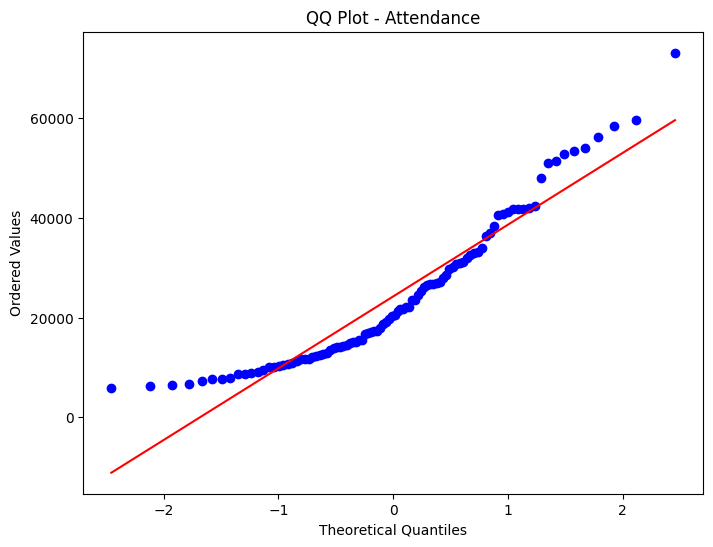

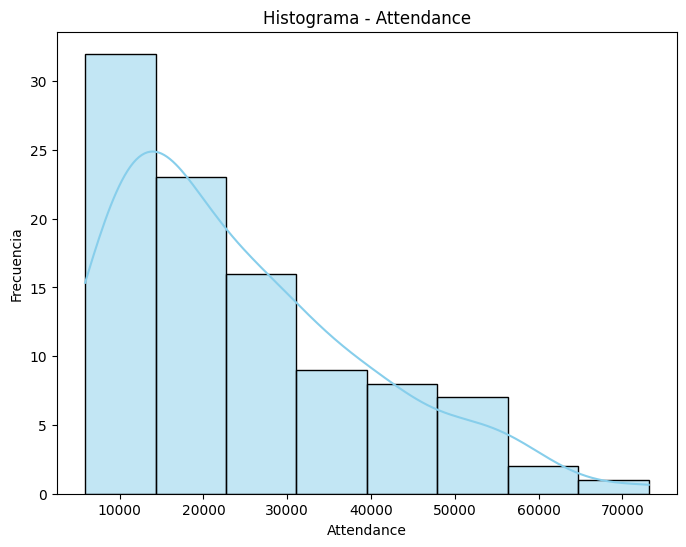

In [24]:
import scipy.stats as stats

# QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(df['Attendance'], dist="norm", plot=plt)
plt.title('QQ Plot - Attendance')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

# Histograma
plt.figure(figsize=(8, 6))
sns.histplot(df['Attendance'], kde=True, color='skyblue')
plt.title('Histograma - Attendance')
plt.xlabel('Attendance')
plt.ylabel('Frecuencia')
plt.show()

Visualment es pot observar que aquesta variable no segueix una distribució normal, a través del gràfic QQ, els valors observats no s'ajusten a la línia d'assumpció de normalitat. De la mateixa manera, passa amb l'histograma, on no s'observa una forma de campana, sinó una distribució dels valors observats decreixent asimètrica cap al màxim.

Visualmente se oberva cómo esta variable no sigue una distribución normal, a través de qqplot los valores observados no se ajustan a la recta de suposición de normalidad. De la misma manera pasa con el histograma, dónde no se observa una forma forma de campana sino una distribución de los valores observados decrecientes asimétricos hacia el máximo.

Visually, it can be observed that this variable does not follow a normal distribution. The QQ plot shows that the observed values do not fit the line of normality assumption. Similarly, the histogram does not exhibit a bell-shaped curve but rather a skewed distribution of observed values decreasing towards the maximum.

In [25]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = df['GF']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=10.676, p=0.005
Probably not Gaussian


In [26]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = df['GF']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < cv:
  print('Probably Gaussian at the %.1f%% level' % (sl))
 else:
  print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=1.639
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


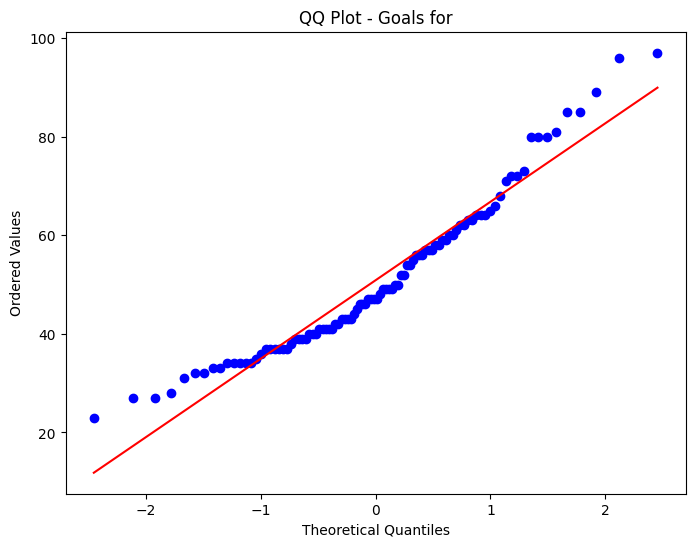

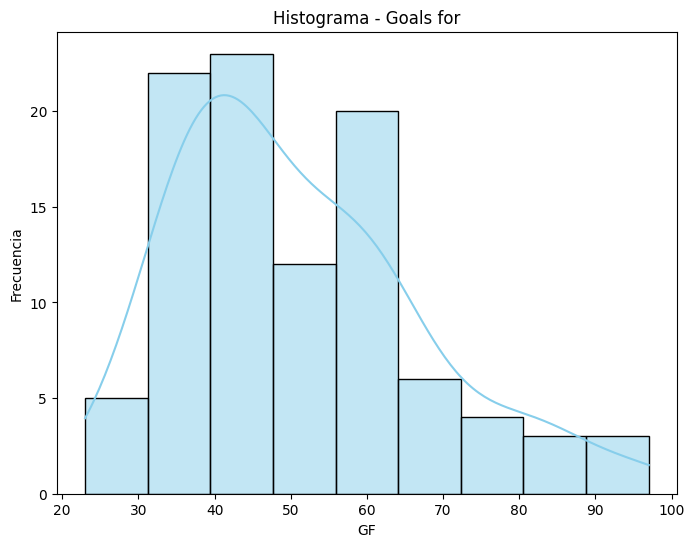

In [27]:
# QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(df['GF'], dist="norm", plot=plt)
plt.title('QQ Plot - Goals for')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

# Histograma
plt.figure(figsize=(8, 6))
sns.histplot(df['GF'], kde=True, color='skyblue')
plt.title('Histograma - Goals for')
plt.xlabel('GF')
plt.ylabel('Frecuencia')
plt.show()

S'han repetit els càlculs i representat de forma gràfica per a la variable GF, que són els gols a favor, obtenint un resultat similar però un grau més suau, tot i així, sense suficient evidència per a concloure que segueix una distribució normal i com també ho confirmen els gràfics.

Se han repetido los cálculos y representado de forma gráfica para la variable GF, que son los goles a favor, obteniendo un resultado similar pero un grado más suave, aunque igualmente, sin suficiente evidencia para concluir que sigue una distribución normal y cómo también lo confirman los gráficos.

The calculations have been repeated and graphically represented for the variable GF, which represents goals scored, obtaining a similar but smoother result. However, there is still not enough evidence to conclude that it follows a normal distribution, as also confirmed by the graphs.

- Exercici 2

Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

- Ejercicio 2

Con el mismo dataset selecciona otros dos atributos del conjunto de datos. Calcula los p-valores y di si rechazan la hipótesis nula cogiendo un alfa de 5%.

- Exercise 2

With the same dataset select two other attributes from the dataset. Calculate the p-values ​​and say whether they reject the null hypothesis by taking an alpha of 5%.





In [30]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = df['Attendance']
data2 = df['GF']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.460, p=0.000
Probably dependent


In [31]:
from scipy.stats import kendalltau
data1 = df['Attendance']
data2 = df['GF']
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.317, p=0.000
Probably dependent


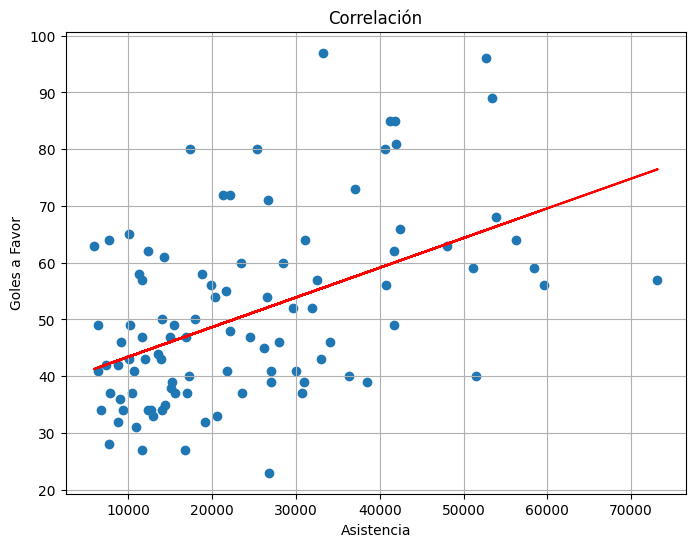

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(data1, data2)
plt.xlabel('Asistencia')
plt.ylabel('Goles a Favor')
plt.title('Correlación')

# Añadir la recta de regresión
m, b = np.polyfit(data1, data2, 1)
plt.plot(data1, m*data1 + b, color='red')

plt.grid(True)
plt.show()

S'han realitzat dos tests no paramètrics per a observacions que no presenten una distribució normal, obtenint com a resultat que el valor de p és menor que 0,05, la qual cosa indica que hi ha suficient evidència per rebutjar la hipòtesi nul·la d'independència entre les variables. Per tant, les dades suggereixen que les variables "Assistència" (Attendance) i "Gols a Favor" (Goals For) probablement estan relacionades, el que significa que hi ha una relació significativa entre elles. El gràfic de dispersió amb la recta de regressió recolza visualment aquesta relació.

Se han realizado dos test no paramétricos para observaciones que no presentan una distribución normal, obteniendo cómo resultado el valor de p es menor que 0.05, lo que indica que hay suficiente evidencia para rechazar la hipótesis nula de independencia entre las variables. Por lo tanto, los datos sugieren que las variables "Asistencia" (Attendance) y "Goles a Favor" (Goals For) probablemente están relacionadas, lo que significa que existe una relación significativa entre ellas. El gráfico de dispersión con la recta de regresión apoya visualmente esta relación.

Two non-parametric tests have been performed for observations that do not follow a normal distribution, resulting in a p-value less than 0.05, indicating sufficient evidence to reject the null hypothesis of independence between the variables. Therefore, the data suggests that the variables "Attendance" and "Goals For" are likely related, meaning there is a significant relationship between them. The scatter plot with the regression line visually supports this relationship.

- Exercici 3

Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

- Ejercicio 3

Continúa con el conjunto de datos adjunto y selecciona tres atributos del conjunto de datos. Calcula el p-valor y di si rechaza la hipótesis nula cogiendo un alfa de 5%.

- Exercise 3

Continue with the attached dataset and select three attributes from the dataset. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.



In [55]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = df['xG']
data2 = df['GF']
data3 = df['W']
stat, p = kruskal(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=195.105, p=0.000
Probably different distributions


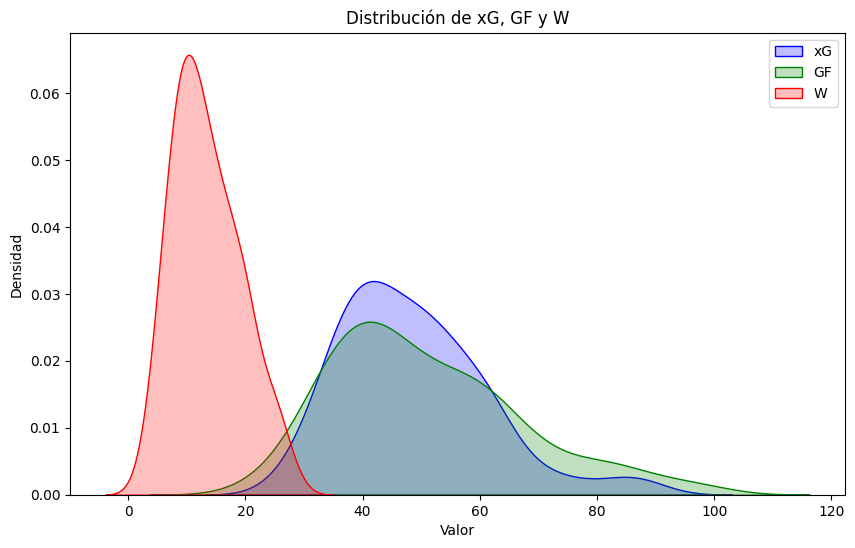

In [58]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data1, color='blue', label='xG', fill=True)
sns.kdeplot(data=data2, color='green', label='GF', fill=True)
sns.kdeplot(data=data3, color='red', label='W', fill=True)

# Etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Distribución de xG, GF y W')
plt.legend()

plt.show()


Comparant les variables de gols a favor, gols esperats i victòries a través del test de Kruskal-Wallis, un test no paramètric per a més de 3 variables amb distribucions desconegudes, s'obté un resultat que indica que hi ha suficient evidència per rebutjar la hipòtesi nul·la que totes les mostres provenen de la mateixa distribució. En altres paraules, les distribucions d'aquestes tres variables són diferents i hi ha diferències significatives entre elles. Analitzant gràficament, es pot observar que les variables de gols a favor i gols esperats tenen una distribució semblant, però són diferents de la variable victòria.

Comparando las variables de goles a favor, goles esperados y victorias a través deltest de kruskal wallis, test no paramétrico para más de 3 variables con distribuciones desconocidas, este devuelve un resultado que  indica que hay suficiente evidencia para rechazar la hipótesis nula de que todas las muestras provienen de la misma distribución. En otras palabras, las distribuciones de estas tres variables son diferentes y existen diferencias significativas entre ellas.
Analizando gráficamente, se puede observar que las variables de goles a favor y goles esperados si tienen un distribución parecida pero son distintas de la variable victoria.

Comparing the variables of goals scored, expected goals, and wins through the Kruskal-Wallis test, a non-parametric test for more than 3 variables with unknown distributions, the test returns a result that indicates there is enough evidence to reject the null hypothesis that all samples come from the same distribution. In other words, the distributions of these three variables are different, and there are significant differences between them. Analyzing graphically, it can be observed that the variables of goals scored and expected goals have a similar distribution but are different from the variable wins.

